# Sub-task 3
Use the enriched file to predict the target variable (safety_flag). 

## Frame the Problem

After analysing the problem, we can know that it is a supervised classification task.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

## 1. Load the pre-processed data

In [2]:
encriched_path_final = '../data/encriched_result_final.csv'
data = pd.read_csv(encriched_path_final)

In [3]:
# Take a look at our data.
# Get a better understanding of the data set
data.head()

,street,state,city,post_code,attom_tax_assessor.areabuilding,attom_tax_assessor.arealotacres,attom_tax_assessor.cbsacode,attom_tax_assessor.cbsaname,attom_tax_assessor.contactownermailaddresscity,attom_tax_assessor.contactownermailaddresscrrt,...,attom_tax_assessor.taxfiscalyear,attom_tax_assessor.taxyearassessed,attom_avm.confidencescore,attom_avm.estimatedmaxvalue,attom_avm.estimatedminvalue,attom_avm.fsd,latitude,longitude,safety_flag,attom_tax_assessor.deckflag
0,3160 otto dr,FL,Lakeland,33812-5237,1597.0,0.236800,29460.0,"LAKELAND, FL METROPOLITAN STATISTICAL AREA",Lakeland,R048,...,2017.0,2018.0,89.0,237000.0,189000.0,11.0,27.961805,-81.904133,False,False
1,940 tulip dr,IN,Indianapolis,46227,1397.0,0.503007,26900.0,"INDIANAPOLIS-CARMEL, IN METROPOLITAN STATISTIC...",Indianapolis,C010,...,2017.0,2018.0,48.0,158000.0,80000.0,32.0,39.667546,-86.142470,False,False
2,68 rocky top rd,VA,Troutville,24175-6054,1008.0,1.000000,40220.0,"ROANOKE, VA METROPOLITAN STATISTICAL AREA",Troutville,R002,...,2018.0,2018.0,62.0,157000.0,98000.0,23.0,37.439224,-79.956768,False,True
3,3330 taylor blair rd,OH,West Jefferson,43162,0.0,1.500000,18140.0,"COLUMBUS, OH METROPOLITAN STATISTICAL AREA",London,R006,...,2018.0,2018.0,50.0,129000.0,69000.0,30.0,39.987500,-83.336422,False,False
4,4254 eagle landing parkway,FL,Orange Park,32065,3472.0,0.241414,27260.0,"JACKSONVILLE, FL METROPOLITAN STATISTICAL AREA",Orange Park,H009,...,2018.0,2018.0,92.0,462000.0,380000.0,9.0,30.155867,-81.865056,False,False


## 2. Feature engineering

### 2.1 Feature selection
There are features of address infomation, and we could use longitude and latitude to represent them. 

In [4]:
# Delete the address columns
data = data.drop(columns = ['attom_tax_assessor.contactownermailaddresscity',
       'attom_tax_assessor.contactownermailaddresscrrt',
       'attom_tax_assessor.contactownermailaddressfull',
       'attom_tax_assessor.contactownermailaddresshousenumber',
       'attom_tax_assessor.contactownermailaddressstate',
       'attom_tax_assessor.contactownermailaddressstreetname',
       'attom_tax_assessor.contactownermailingcounty','attom_tax_assessor.propertyaddresscity',
       'attom_tax_assessor.propertyaddresscrrt',
       'attom_tax_assessor.propertyaddressfull',
       'attom_tax_assessor.propertyaddresshousenumber',
       'attom_tax_assessor.propertyaddressstate',
       'attom_tax_assessor.propertyaddressstreetname',
       'attom_tax_assessor.propertyaddressstreetsuffix','attom_tax_assessor.situscounty',
       'attom_tax_assessor.situsstatecode','attom_tax_assessor.contactownermailaddresszip',
       'attom_tax_assessor.contactownermailaddresszip4', 'attom_tax_assessor.contactownermailingfips',
       'attom_tax_assessor.propertyaddresszip4','attom_tax_assessor.situscounty',
       'attom_tax_assessor.situsstatecode','attom_tax_assessor.situsstatecountyfips',
       'attom_tax_assessor.cbsacode','attom_tax_assessor.cbsaname','attom_tax_assessor.msaname',
       'attom_tax_assessor.parcelnumberraw','attom_tax_assessor.propertyjurisdictionname'])
# Delete the owner name column
data = data.drop(columns = ['attom_tax_assessor.partyowner1namefull'])

### 2.2 Dealing with null values based on data type

In [5]:
df_float = data.select_dtypes(include=['float64'])
float_columns = df_float.columns
data[float_columns] = df_float.interpolate()

In [6]:
df_object = data.select_dtypes(include=['object'])
object_columns = df_object.columns
data[object_columns] = df_object.fillna('UNKNOWN')

In [7]:
assert (data.isnull().sum().any() != 0) == False

### 2.3 Dealing with data types

In [8]:
data.dtypes

street                                             object
state                                              object
city                                               object
post_code                                          object
attom_tax_assessor.areabuilding                   float64
attom_tax_assessor.arealotacres                   float64
attom_tax_assessor.hvacheatingdetail              float64
attom_tax_assessor.ownertypedescription1           object
attom_tax_assessor.ownertypedescription2           object
attom_tax_assessor.parkinggarage                  float64
attom_tax_assessor.previousassessedvalue          float64
attom_tax_assessor.propertylatitude               float64
attom_tax_assessor.propertylongitude              float64
attom_tax_assessor.propertyusegroup                object
attom_tax_assessor.propertyusestandardized        float64
attom_tax_assessor.roofmaterial                   float64
attom_tax_assessor.storiescount                   float64
attom_tax_asse

In [9]:
data['attom_tax_assessor.deckflag'] = data['attom_tax_assessor.deckflag'].astype('bool')

data['street'] = data['street'].astype('category')
data['state'] = data['state'].astype('category')
data['city'] = data['city'].astype('category')
data['post_code'] = data['post_code'].astype('category')
data['attom_tax_assessor.ownertypedescription1'] = data['attom_tax_assessor.ownertypedescription1'].astype('category')
data['attom_tax_assessor.ownertypedescription2'] = data['attom_tax_assessor.ownertypedescription2'].astype('category')
data['attom_tax_assessor.propertyusegroup'] = data['attom_tax_assessor.propertyusegroup'].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7374 entries, 0 to 7373
Data columns (total 30 columns):
street                                            7374 non-null category
state                                             7374 non-null category
city                                              7374 non-null category
post_code                                         7374 non-null category
attom_tax_assessor.areabuilding                   7374 non-null float64
attom_tax_assessor.arealotacres                   7374 non-null float64
attom_tax_assessor.hvacheatingdetail              7374 non-null float64
attom_tax_assessor.ownertypedescription1          7374 non-null category
attom_tax_assessor.ownertypedescription2          7374 non-null category
attom_tax_assessor.parkinggarage                  7374 non-null float64
attom_tax_assessor.previousassessedvalue          7374 non-null float64
attom_tax_assessor.propertylatitude               7374 non-null float64
attom_tax_assessor.prop

In [11]:
data.describe()

,attom_tax_assessor.areabuilding,attom_tax_assessor.arealotacres,attom_tax_assessor.hvacheatingdetail,attom_tax_assessor.parkinggarage,attom_tax_assessor.previousassessedvalue,attom_tax_assessor.propertylatitude,attom_tax_assessor.propertylongitude,attom_tax_assessor.propertyusestandardized,attom_tax_assessor.roofmaterial,attom_tax_assessor.storiescount,...,attom_tax_assessor.taxassessedvalueland,attom_tax_assessor.taxbilledamount,attom_tax_assessor.taxfiscalyear,attom_tax_assessor.taxyearassessed,attom_avm.confidencescore,attom_avm.estimatedmaxvalue,attom_avm.estimatedminvalue,attom_avm.fsd,latitude,longitude
count,7.374000e+03,7374.000000,7374.000000,7374.000000,7.374000e+03,7374.000000,7374.000000,7374.000000,7374.000000,7374.000000,...,7.374000e+03,7.374000e+03,7374.000000,7374.000000,7374.000000,7.374000e+03,7.374000e+03,7374.000000,7374.000000,7374.000000
mean,9.765338e+03,2.989123,152.329672,248.759561,1.061608e+06,36.973613,-91.705648,381.302482,104.746474,1.337809,...,2.443524e+05,2.297545e+04,2017.761052,2017.882154,70.508679,4.405712e+05,2.796904e+05,20.434974,37.264295,-92.214632
std,6.612414e+04,124.932704,55.446651,414.971980,7.053857e+06,5.110553,16.199307,11.928119,5.288057,1.969481,...,1.696504e+06,1.363562e+05,0.820431,0.725841,16.511167,4.423695e+05,2.331179e+05,11.280170,5.003362,17.608610
min,0.000000e+00,0.000000,101.000000,0.000000,0.000000e+00,19.708851,-159.509777,181.000000,101.000000,0.000000,...,0.000000e+00,0.000000e+00,2009.000000,2009.000000,17.000000,3.300000e+04,1.386000e+04,7.000000,19.610934,-159.509741
25%,1.192250e+03,0.118716,105.000000,1.000000,4.831250e+04,33.531653,-98.671674,385.000000,101.000000,1.000000,...,3.230000e+03,1.670500e+03,2017.500000,2018.000000,60.000000,2.070000e+05,1.380000e+05,13.000000,33.743235,-108.515314
50%,1.650000e+03,0.200000,110.000000,11.000000,1.344700e+05,37.757221,-86.521924,385.000000,103.000000,1.000000,...,2.100000e+04,3.263665e+03,2018.000000,2018.000000,73.000000,3.150000e+05,2.200000e+05,17.000000,38.379530,-86.004127
75%,2.335750e+03,0.450000,219.000000,500.000000,2.697128e+05,40.856163,-79.926782,385.000000,108.000000,2.000000,...,7.253225e+04,5.895403e+03,2018.000000,2018.000000,84.000000,5.050000e+05,3.490000e+05,24.000000,40.855135,-77.107443
max,3.911254e+06,10500.000000,236.000000,999.000000,2.147057e+08,61.534983,-68.684721,401.000000,130.000000,73.000000,...,6.654476e+07,3.559554e+06,2019.000000,2020.000000,96.000000,4.536000e+06,2.557000e+06,110.000000,61.230969,-68.682183


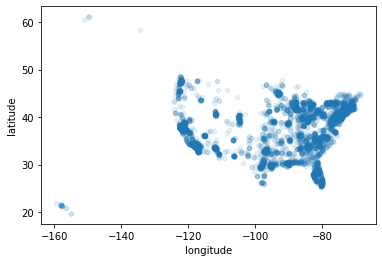

In [12]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

## 3. Create a Test Set

### 2.4 Feature Scaling

In [13]:
# The label is safety_flag.
label = data['safety_flag'].tolist()
data = data.drop(columns = ['safety_flag'])

In [14]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.2, random_state=42)

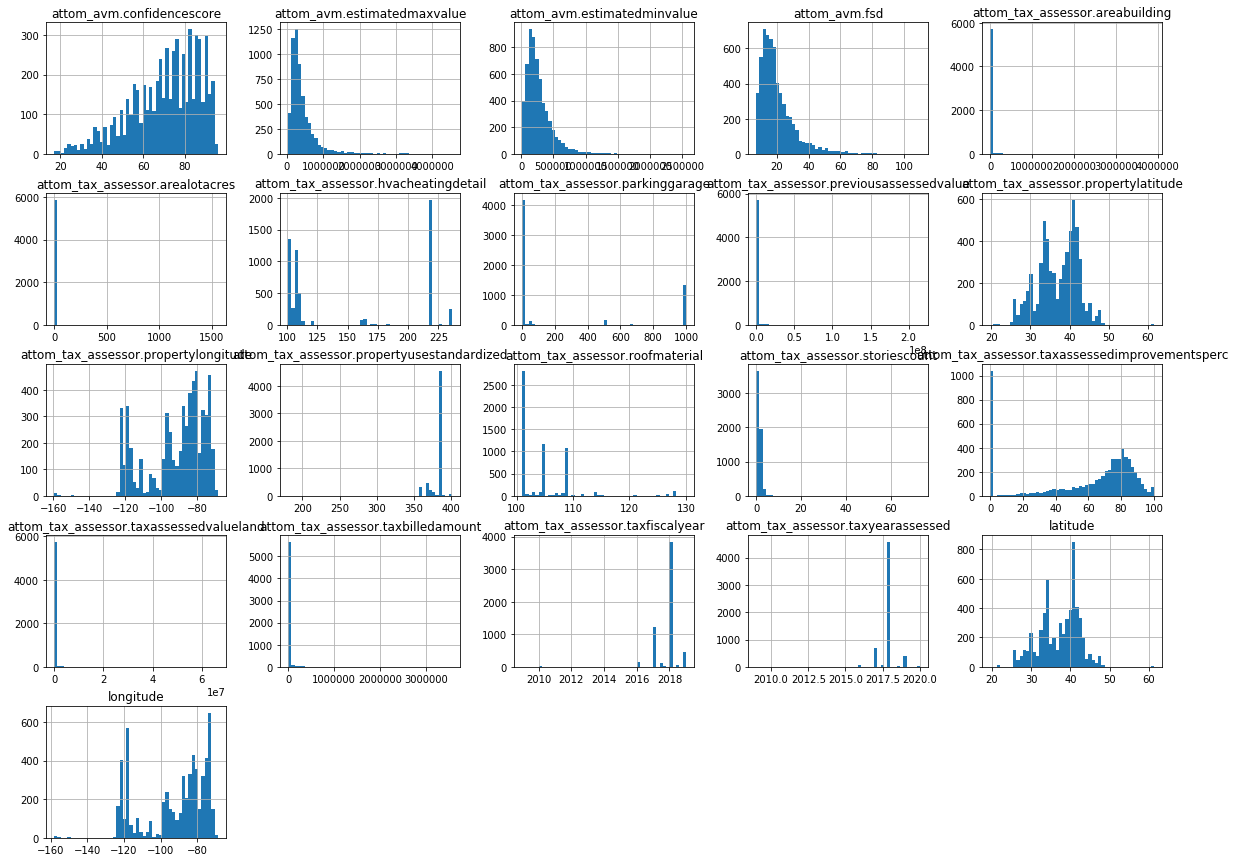

In [15]:
data_train.select_dtypes(include=['float64']).hist(bins=50, figsize=(20,15)) 
plt.show()

In [16]:
# Standardization

num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])

num_attribs = data_train.select_dtypes(include=['float64']).columns
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
])
data_prepared = full_pipeline.fit_transform(data_train)

## 4. Select and Train a Model

In [17]:
test_prepared = full_pipeline.transform(data_test)

### 4.1 SGDClassifier

In [18]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(data_prepared,label_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
sgd_pre = sgd_clf.predict(test_prepared)

In [20]:
cross_val_score(sgd_clf, data_prepared, label_train, cv=3, scoring="accuracy")

array([0.96187087, 0.96187087, 0.96234097])

Above 96% accuracy (ratio of correct predictions) on all cross-validation folds

In [21]:
# let’s look at a very dumb classifier that just classifies every single instance in the “not-save” class:
class NeverSaveClassifier(BaseEstimator): 
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [22]:
never_safe_clf = NeverSaveClassifier()
cross_val_score(never_safe_clf, data_prepared, label_train, cv=3, scoring="accuracy")

array([0.96695475, 0.96134283, 0.95930824])

it has over 95% accuracy

In [23]:
print(classification_report(label_test,sgd_pre))
print("Accuracy:",metrics.accuracy_score(label_test, sgd_pre))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1411
        True       0.00      0.00      0.00        64

    accuracy                           0.96      1475
   macro avg       0.48      0.50      0.49      1475
weighted avg       0.92      0.96      0.94      1475

Accuracy: 0.9566101694915254


/Users/ailsa/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 4.2 LogisticRegression

In [24]:
log_reg = LogisticRegression()
log_reg.fit(data_prepared,label_train)

/Users/ailsa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Let’s try the logistics Regression model out on a few instances from the training set:

In [25]:
some_data = data_train[:5]
some_labels = label_train[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", log_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [False False False False False]
Labels: [False, False, False, False, False]


In [26]:
log_pre = log_reg.predict(test_prepared)

In [27]:
cross_val_score(log_reg, data_prepared, label_train, cv=3, scoring="accuracy")

/Users/ailsa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ailsa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ailsa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.96237926, 0.96237926, 0.96284987])

In [28]:
print(classification_report(label_test,log_pre))
print("Accuracy:",metrics.accuracy_score(label_test, log_pre))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1411
        True       0.00      0.00      0.00        64

    accuracy                           0.96      1475
   macro avg       0.48      0.50      0.49      1475
weighted avg       0.92      0.96      0.94      1475

Accuracy: 0.9566101694915254


/Users/ailsa/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 4.3 RandomForestClassifier

In [29]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(data_prepared,label_train)

/Users/ailsa/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
forest_pre = log_reg.predict(test_prepared)

In [31]:
cross_val_score(forest_clf, data_prepared, label_train, cv=3, scoring="accuracy")

array([0.96136248, 0.96237926, 0.96132316])

In [32]:
print(classification_report(label_test,forest_pre))
print("Accuracy:",metrics.accuracy_score(label_test, forest_pre))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1411
        True       0.00      0.00      0.00        64

    accuracy                           0.96      1475
   macro avg       0.48      0.50      0.49      1475
weighted avg       0.92      0.96      0.94      1475

Accuracy: 0.9566101694915254


/Users/ailsa/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


From the result, we can find that these three classifier have similar performance. The next step would be fine turn the models and do the evaluation on test set. Based on the evaluation, we can select the suitable model.